                                   **Collaborative Filtering Methods In Product Recommendation.**

***
Nowadays, Product Recommendation is a widely used tool in a variety of areas from music apps to e-shops or pretty much in any platform the user interacts with. Recommendation Systems’ purpose is to attract new customers or to help the current ones by offering suggestions based on  habits, interests, prior transactions or even the customer's profile. 
Recommendation Systems are classified based on: 

* What data the recommender engine needs as to make the  recommendations?
* How the recommendations are produced?

There are two main categories, **content** filtering and **collaborative** based filtering.


In **content** based filtering, the data used, include customer as well as product metadata information. According to the genre eg.in movies: If a customer watched a romantic movie in the past, the system is going to assume that the customers "likes" romance genre, so the output will include movies that have been categorized with the romance label.

Another way, to make recommendations, is by looking into the customer's transactions (interactions with available products) and try to predict what "rating" the customer would give to an unrated product. **Collaborative** filtering does that, not by looking into categories and tags, but by trying to find customers that have interacted with the same products our target customer has (<ins/>user based recommendations</ins>). These similar customers and their preferences are the source for the recommender engine as to predict for every product the target customer has not interacted with, what rating would he give. For example, in gaming: Paul bought FIFA 2021 and Jo also bought FIFA 2021, Jo also bought Super Mario, so the systems recommends Super Mario to Paul. 
Another approach, for making this prediction comes from finding products displaying a degree of similarity to the products the target customer has already purchased (<ins/>item based recommendations</ins>), eg.in groceries: It is quite common for someone who bought milk to buy cereal as well. The difference is that now we are focusing on products rather than customers to help us make our recommendations.

***
This project looks into **Collaborative Filtering Methods In Product Recommendation.**
The goals were to:
* Understand how a recommendations systems works.
* Which method suit the data we are provided with? (collaborative, content, hybrid)
* How important is the "rating" as to recognize the customer, product interactions.
* Which algorithms and methods produce the best output. (Surprise, LightFM library)
* How to evaluate a product recommendation system? 
* Are the recommendations produced by this system aligned with the customer's needs?

For the technical part, as to deliver answers to the above goals two different Python libraries were used:
* Surprise
* LightFM

***
Project Structure:

* Prior to any model building, looking into our data in the Data_Preprosessing.ipynb Jupyter Notebook was a must, as to understand and adjust the data according to the project’s needs.
* Then, in RS1_Surprise.ipynb and by using the Surprise library models it provides, recommendations were produced, evaluated and compared across the different models and model hyperparameter tunings.
* The same process took place for LightFM and its embeddings model in RS2_LightFM.ipynb . 
* In Comparison.ipynb, both Surprise and LightFM results are compared as to find out which system outperformed the other.
* Also, All_Functions.py is a python file, with all the libraries, packages used and the customed made functioned created for this project.
It does not run separately, but as part of the delivered Jupyter Notebooks, for functionality reasons.

**So, this assignment  focuses on  Collaborative filtering, in order to draw User Based recommendations and the data available are transactions made by foodservice customers (Everest) dated from 2020-01-01 to 2020-07-31.** 
***



## Data Preprocessing 

In [62]:
#load packges , functions
%run ./All_Functions.py
%matplotlib inline


In [63]:
#load data 
df = pd.read_csv('./data/EverestData.csv')
products_df = pd.read_csv("./data/Products.csv")
customers_df = pd.read_csv("./data/Customers.csv")

#data preview
df.head()


,Unnamed: 0,invoiceid,ProductId,ProductIdName,Quantity,ProductDiscount,ProductAmount,sieben_StoreId,sieben_StoreIdName,TotalAmount,CustomerId,CustomerIdName,DateDelivered
0,0,0A2DED35-2A2C-EA11-A81D-000D3A497E15,B5700A7C-EC98-E911-80CF-000D3AB18B8E,FRAPPE REGULAR,1.0,0.00,1.30,F6351BDC-71A1-E911-80CF-000D3AB18B8E,ΧΟΛΑΡΓΟΣ,1.30,F1127ADB-3113-EA11-A81C-000D3A497E15,Ιωάννης Παπανικολάου,2020-01-01 00:04:00
1,1,E375C523-302C-EA11-A81D-000D3A497E15,3BC57A94-EC98-E911-80CF-000D3AB18B8E,CAP CALDO REGULAR ARABICA,1.0,0.00,1.95,6A361BDC-71A1-E911-80CF-000D3AB18B8E,ΑΛΙΜΟΣ,1.95,21B1A7AB-0628-EA11-A81D-000D3A497E15,Ιωαννης Χαρατσιδης,2020-01-01 00:46:00
2,2,BDBA0292-2F2C-EA11-A81D-000D3A497E15,12C57A94-EC98-E911-80CF-000D3AB18B8E,ESPR CALDO SINGLE ARABICA,1.0,0.00,1.30,F4351BDC-71A1-E911-80CF-000D3AB18B8E,ΑΓ. ΜΕΛΕΤΙΟΥ,1.30,2B5339B0-4B17-EA11-A81C-000D3A497E15,Σταυρουλα Αχλιοπτα,2020-01-01 00:38:00
3,3,E461921F-3A2C-EA11-A81D-000D3A497E15,0DC57A94-EC98-E911-80CF-000D3AB18B8E,ESPRESSO FREDDO ARABICA,1.0,1.00,1.90,08361BDC-71A1-E911-80CF-000D3AB18B8E,ΑΜΠΕΛΟΚΗΠΟΙ,0.90,1EF60B10-221D-EA11-A81D-000D3A497E15,Panos Diamantopoulos,2020-01-01 01:58:00
4,4,2C19C967-332C-EA11-A81D-000D3A497E15,0DC57A94-EC98-E911-80CF-000D3AB18B8E,ESPRESSO FREDDO ARABICA,1.0,0.44,1.90,1C361BDC-71A1-E911-80CF-000D3AB18B8E,ΗΛΙΟΥΠΟΛΗ (ΠΛΑΤΕΙΑ),3.35,B3CA5847-5722-EA11-A81D-000D3A497E15,ΜΑΡΙΑ ΣΤΑΜΟΚΩΣΤΑ,2020-01-01 01:08:00


In [64]:
# Remove negative values

df=df.loc[df['Quantity'] > 0]
df=df.loc[df['TotalAmount'] > 0]
df=df.loc[df['ProductAmount'] > 0]

df.describe()

,Unnamed: 0,Quantity,ProductDiscount,ProductAmount,TotalAmount
count,1.272941e+06,1.272941e+06,1.272940e+06,1.272941e+06,1.272941e+06
mean,6.936574e+05,1.039238e+00,1.997976e-01,1.848039e+00,3.729776e+00
std,4.031989e+05,1.083969e+01,4.571533e-01,6.341158e+00,9.085579e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,1.000000e-02
25%,3.436250e+05,1.000000e+00,0.000000e+00,1.500000e+00,1.900000e+00
50%,6.897470e+05,1.000000e+00,0.000000e+00,1.900000e+00,2.800000e+00
75%,1.044549e+06,1.000000e+00,8.000000e-02,1.950000e+00,4.450000e+00
max,1.393395e+06,6.977000e+03,2.564000e+01,3.488500e+03,3.490450e+03


In [65]:
#Remove Non-Products
print('Before : {} rows'.format(df.shape[0]))
#non product values
search_values=['ΠΡΟΣΘΕΤΑ','ΛΑΘΟΣ','ΠΡΟΣΦΟΡΑ','ΤΕΛΟΣ','FREE ΚΑΦΕΣ','FREE ΧΥΜΟΣ','ΔΩΡΕΑΝ','ΠΕΡΙΒΑΛΛΟΝΤΙΚΟ ΤΕΛΟΣ']
to_drop=df[df.ProductIdName.str.contains('|'.join(search_values ))]
#remove them 
df=df.drop(to_drop.index,axis=0)
print('After : {} rows'.format(df.shape[0]))


Before : 1272941 rows
After : 1224484 rows


In [66]:
#Nan , Duplicated rows check 
print("NaN values:\n{}\n".format(df.isna().sum()))
print("Duplicated values: {}".format(df.duplicated().sum()))

NaN values:
Unnamed: 0              0
invoiceid               0
ProductId               0
ProductIdName           0
Quantity                0
ProductDiscount         1
ProductAmount           0
sieben_StoreId        258
sieben_StoreIdName    258
TotalAmount             0
CustomerId              0
CustomerIdName          0
DateDelivered           0
dtype: int64

Duplicated values: 0


In [67]:
#to datetime  
df.DateDelivered= pd.to_datetime(df.DateDelivered)
df.dtypes

Unnamed: 0                     int64
invoiceid                     object
ProductId                     object
ProductIdName                 object
Quantity                     float64
ProductDiscount              float64
ProductAmount                float64
sieben_StoreId                object
sieben_StoreIdName            object
TotalAmount                  float64
CustomerId                    object
CustomerIdName                object
DateDelivered         datetime64[ns]
dtype: object

In [68]:
#Dataframe's time span
time_frame="Data from {0} to {1} ".format(df.DateDelivered.min() ,df.DateDelivered.max())
print(time_frame)

Data from 2020-01-01 00:04:00 to 2020-07-31 23:59:00 


## Correspondance  between ids

***
Between __ProductId__ and __ProductIdName__  exists a difference of 21 meaning that
__more than one ProductId corresponds to the same ProductIdName__.

This also happens for __CustomerId__ and __CustomerIdName__, which means that more than one CustomerId
corresponds to one CustomerIdName.
In that case, it is of no concern because   __is possible for some
people to share the same name.__
***

In [69]:
df.nunique()

Unnamed: 0            1224484
invoiceid              771478
ProductId                 623
ProductIdName             602
Quantity                   26
ProductDiscount           493
ProductAmount             566
sieben_StoreId            115
sieben_StoreIdName        115
TotalAmount              2351
CustomerId              42226
CustomerIdName          41541
DateDelivered          419765
dtype: int64

In [70]:
#the change is only applied in Products  
id_correspondance(df,'CustomerId')
id_correspondance(df,'ProductId')

Number of unique CustomerId :  42226 
Number of  unique CustomerIdName :  41541 
CustomerIdName with more than one CustomerId : 
             CustomerIdName  correspondence
0       Nikos Papadopoulos              40
1       Νικος Παπαδόπουλος              19
2       Δημήτρης Δημητρίου               5
3       Ελένη Παπαδοπούλου               5
4     Χρήστος Παπαδόπουλος               5
..                     ...             ...
553      Νίκος Καραθανάσης               2
554         ΧΡΙΣΤΙΝΑ ΠΕΤΣΑ               2
555        Χρηστος Χρηστος               2
556        Βαγγελης Μακρης               2
557  Γεώργιος Παπαδόπουλος               2

[558 rows x 2 columns]


Number of unique ProductId :  623 
Number of  unique ProductIdName :  602 
ProductIdName with more than one ProductId : 
                        ProductIdName  correspondence
0          VEGAN CAP. FREDDO REGULAR               3
1            VEGAN CAP. CALDO SINGLE               3
2            VEGAN CAP. CALDO GRANDE           

In [71]:
#
print('Inital data:\n')
print('Number of Customers: {}'.format(df['CustomerId'].drop_duplicates().size))
print('Number of Products: {}'.format(df['ProductId'].drop_duplicates().size))

print('Number of Invoices: {}'.format(df['invoiceid'].drop_duplicates().size))
print('Number of Transactions: {}'.format(df.shape[0]))

Inital data:

Number of Customers: 42226
Number of Products: 602
Number of Invoices: 771478
Number of Transactions: 1224484


 ### Fix Quantity

In [72]:
#origianal Quantity
print('Transactions Before: {0}'.format(df.shape[0]))
df['Quantity'].value_counts()[:10]

quantity=df['Quantity']

Transactions Before: 1224484


In [73]:
# def fix_quantity(df):
#     """
#     Input:
#     -----
#             df:dataframe
#     Purpose:
#     -------
#             modify the Quantity column as to represent the actual number of products per invoice
#             ex. invoiceid|ProductId|Quantity
#                 1        |A        |1.0
#                 1        |A        |1.0
#             to 
#                 1        |A        |2.0
#     Output:
#     ------
#             Updated dataframe                     
#     """
#     print('Rows before: {}'.format(df.shape[0]))
#     #calculate quantity per product in invoice
#     new_quantity=df.groupby(['invoiceid','ProductId'])['Quantity'].sum().reset_index()
#     #update data , drop duplicates as to match sizes
#     df=df.drop_duplicates(['invoiceid','ProductId']).merge(new_quantity,on=['invoiceid','ProductId'])
#     df=df.drop(columns='Quantity_x').rename(columns={'Quantity_y': 'Quantity'})
#     print('Rows after: {}'.format(df.shape[0]))
#     return df

In [74]:
df=fix_quantity(df)


Rows before: 1224484
Rows after: 1111769


### after processing quantity


In [75]:


# shape_after=df.groupby(['invoiceid','ProductIdName'])['Quantity'].sum().reset_index().sort_values('Quantity').shape[0]
# print('Transactions After: {0}'.format(shape_after))

df.groupby(['invoiceid','ProductIdName'])['Quantity'].sum().reset_index()['Quantity'].value_counts()[:10]

1.0     997402
2.0     100991
3.0      10034
4.0       2364
5.0        439
6.0        236
8.0        101
7.0         68
10.0        43
Name: Quantity, dtype: int64

## Create trainset, testset

#### trainset timespan :  5 months , 

#### testset timespan  :  2 months


In [76]:
#timespan
time_frame

'Data from 2020-01-01 00:04:00 to 2020-07-31 23:59:00 '

In [77]:
#split 
train=df[df['DateDelivered']<'2020-06-01 00:00:00']
print('Train:\n')
print(train['DateDelivered'].describe())
print('\n')
print('Test:\n')
test=df[df['DateDelivered']>='2020-06-01 00:00:00']
print(test['DateDelivered'].describe())
print('\n')

Train:

count                  783268
unique                 305972
top       2020-02-10 06:33:00
freq                       44
first     2020-01-01 00:04:00
last      2020-05-31 23:51:07
Name: DateDelivered, dtype: object


Test:



<ipython-input-77-edc299162f0e>:4: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

<ipython-input-77-edc299162f0e>:8: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                  328501
unique                 113793
top       2020-07-13 05:18:00
freq                       29
first     2020-06-01 00:03:42
last      2020-07-31 23:59:00
Name: DateDelivered, dtype: object




## Filtering



1. Filter out customers with __fewer than 9 invoices__ per set 


2. Both trainset and testset must have the __SAME__ Customers and Products 

In [78]:
#initial train , test 
train.shape , test.shape

((783268, 13), (328501, 13))

In [79]:
#print format
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [80]:
#filter 1
print(color.BOLD +"Filter1\n"+ color.END)
print('Trainset:')
train=filter_invoices(train,10)
print('Testset')
test=filter_invoices(test,10)
print(color.BOLD +"Filter2\n"+ color.END)
print('Customers:')

#filter 2
train,test=filter_similarity(train,test,'CustomerId')
print('Products:')
train,test=filter_similarity(train,test,'ProductId')

Filter1

Trainset:
Invoice per customer filtering:

Number of rows before: 783268
Number of customers with more than 9 invoices: 12382
Number of rows after: 672367

Testset
Invoice per customer filtering:

Number of rows before: 328501
Number of customers with more than 9 invoices: 6501
Number of rows after: 263577

Filter2

Customers:
Keep the same rows filtering:

Number of rows in first dataframe before: 672367
Number of rows in second dataframe before: 263577
Number of unique CustomerId rows in first dataframe: 12382
Number of unique CustomerId rows in second dataframe: 6501
Number of CustomerId rows that exist in both dataframes: 5548

Products:
Keep the same rows filtering:

Number of rows in first dataframe before: 436857
Number of rows in second dataframe before: 236821
Number of unique ProductId rows in first dataframe: 508
Number of unique ProductId rows in second dataframe: 471
Number of ProductId rows that exist in both dataframes: 421



In [81]:
#after filtering 
print(color.BOLD +"Overall"+ color.END)
print('Number of customers: {}'.format(train['CustomerId'].nunique()))
print('Number of products: {}\n'.format(train['ProductId'].nunique()))

print(color.BOLD +"Trainset"+ color.END)
print('Number of invoices: {}'.format(train['invoiceid'].nunique()))
print('Number of rows: {}'.format(train.shape[0]))
print("Data from {0} to {1}\n ".format(train.DateDelivered.min() ,train.DateDelivered.max()))

print(color.BOLD +"Testset"+ color.END)
print('Number of invoices: {}'.format(test['invoiceid'].nunique()))
print('Number of rows: {}'.format(test.shape[0]))
print("Data from {0} to {1} ".format(test.DateDelivered.min() ,test.DateDelivered.max()))


Overall
Number of customers: 5548
Number of products: 421

Trainset
Number of invoices: 314685
Number of rows: 436275
Data from 2020-01-01 00:04:00 to 2020-05-31 23:51:07
 
Testset
Number of invoices: 165154
Number of rows: 236085
Data from 2020-06-01 00:03:42 to 2020-07-31 23:59:00 


## EDA

#### Long Tail

##### product sales , popularity

In [82]:
# import plotly.graph_objs as go

In [83]:
# def long_tail(data,graph=False,title='',color='red'):
#     """
#     Input:
#     ------
#             data:  dataframe to compute most popular products (purchasing frequency)
#             graph: if True returns interactive long tail plot
#             color: specify barplot's color
#             title: plot's title 
#     Purpose:
#     --------
#             computes how many customers bought a  product  
#             (long tail plot)
#     Output:
#     -------
#             dataframe with purchasing product frequency and long tail plot               
#     """

#     long_tail=data.groupby('ProductIdName')['CustomerId'].count().reset_index()
#     long_tail=long_tail.sort_values('CustomerId',ascending=False).rename(columns={'CustomerId':'Customers'})
#     if graph == True:
#         fig = px.line(data_frame=long_tail,x='ProductIdName', y='Customers',title=title,width=800, height=700)
#         fig.add_bar(x=long_tail['ProductIdName'], y=long_tail['Customers'],marker_color=color,name='Product')
#         fig.show()
#     return long_tail

In [84]:
def long_tail(data,graph=False,title=''):
    """
    Input:
    ------
            data:   dataframe to compute most popular products (purchasing frequency)
            graph:  if True returns interactive long tail plot
            color:  specify barplot's color
            title:  plot's title
            choose: by sales or customers 
    Purpose:
    --------
            computes how many sales/transactions belong to each product  
            (long tail plot)
    Output:
    -------
            dataframe with purchasing product frequency and long tail plot               
    """
    #sales per product
    sales=data.groupby('ProductIdName')['CustomerId'].count().reset_index()
    sales=sales.sort_values('CustomerId',ascending=False).rename(columns={'CustomerId':'Sales'})

    #customers per product
    customers=data.groupby('ProductIdName')['CustomerId'].nunique().reset_index()
    customers=customers.sort_values('CustomerId',ascending=False).rename(columns={'CustomerId': 'Customers'})

    long_tail=sales.merge(right=customers,how='inner',on='ProductIdName')  
        
    if graph == True:
        
        fig = px.line(data_frame=long_tail,x='ProductIdName', y='Sales',title=title,width=800, height=700)
        fig.add_bar(x=long_tail['ProductIdName'] , y=long_tail['Sales'] ,marker_color='red',name='Sales',text=long_tail['Sales'],textposition='inside')
        fig.add_bar(x=long_tail['ProductIdName'], y=long_tail['Customers'],marker_color='blue',name='Customers',text=long_tail['Customers'],textposition='inside')
        
        fig.update_layout(barmode='group')
        fig.show()
    return long_tail 

long_tail(data=train,graph=True,title='Trainset: Sales and Customers Per Product')[:1]

,ProductIdName,Sales,Customers
0,ESPRESSO FREDDO ARABICA,60121,3503


In [85]:
long_tail(data=test,graph=True,title='Testset: Sales and Customers Per Product')[:1]

,ProductIdName,Sales,Customers
0,ESPRESSO FREDDO ARABICA,40645,3274


### How many products does a customer purchase  in each set?

In [86]:
train.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().sort_values(
                ascending=False).reset_index().rename(
                columns={'ProductId':'Products_per_customers'})[['CustomerIdName','Products_per_customers']][:5]

,CustomerIdName,Products_per_customers
0,Panagiota Geka,115
1,ΕΥΑΓΓΕΛΟΣ ΛΙΑΝΤΖΟΥΡΑΣ,96
2,Νικος Κουλαξης,81
3,Ευη Αλουση,77
4,Skerdi Xhameta,70


In [87]:
test.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().sort_values(
                ascending=False).reset_index().rename(
                columns={'ProductId':'Products_per_customers'})[['CustomerIdName','Products_per_customers']][:5]

,CustomerIdName,Products_per_customers
0,Πασχάλης Βράνιστας,84
1,Panagiota Geka,77
2,Myrvet Hoxhaj,73
3,Janis Minga,66
4,ΕΥΑΓΓΕΛΟΣ ΛΙΑΝΤΖΟΥΡΑΣ,65


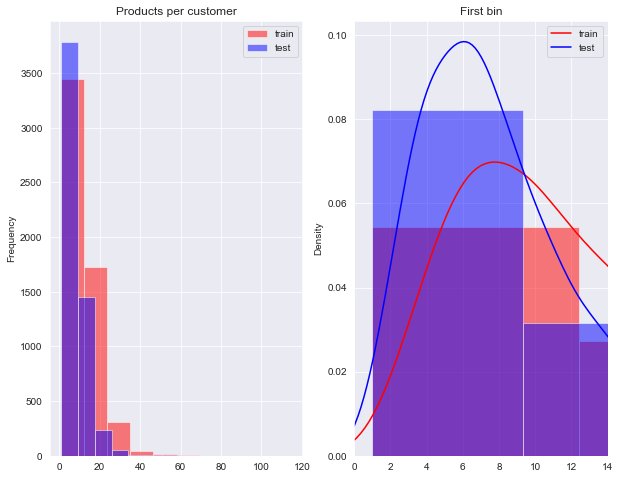

In [88]:
# how many products (no repetition) has the customer bought?
#(relationship between customers and products)
#5 months 
#1st bin : 1-12
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
train.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().plot(kind='hist',
                                                                           color='r', alpha=0.5,title='Products per customer',
                                                                           label='train',grid=True)
#2 months 
test.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().plot(kind='hist',
                                                                        color='b', alpha=0.5,title='Products per customer',
                                                                          label='test',grid=True)

plt.legend()
plt.subplot(1,2,2)
train.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().plot(kind='hist', density=True,
                                                                           color='r', alpha=0.5,title='First bin' ,xlim=(0,14),
                                                                           label='train',grid=True,legend=True)
train.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().plot(kind='kde',
                                                                           color='r',xlim=(0,14),
                                                                            grid=True,legend=False)
test.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().plot(kind='hist', density=True,
                                                                          color='b', alpha=0.5,title='First bin',xlim=(0,14),
                                                                          label='test',grid=True,legend=True )
test.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().plot(kind='kde', 
                                                                          color='b',xlim=(0,14)
                                                                           ,grid=True,legend=False)



plt.show();

***
most customers have purchased  __~10__ products (clean products)

***

#### Look into first bin

In [89]:
product_customer=train.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().reset_index().rename(
                                                                columns={'ProductId':'Products_per_Customer'})
product_customer[:5]

,CustomerId,CustomerIdName,Products_per_Customer
0,000CAC9C-AF57-EA11-A81F-000D3A497E15,Σπύρος Οικονόμου,7
1,001C2C84-A312-EA11-A81C-000D3A497E15,Μιχάλης Παρασκευόπουλος,26
2,002861E1-5721-EA11-A81D-000D3A497E15,Δημητρα Λουστροπούλου,8
3,00382A56-9D15-EA11-A81C-000D3A497E15,Tatiana Tarasenko,1
4,00459F71-952D-EA11-A81D-000D3A497E15,Stylianos Voulgaridis,4


In [90]:
product_customer=train.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().reset_index().rename(
                                                                columns={'ProductId':'Products_per_Customer'})
product_customer['Products_per_Customer'].value_counts().reset_index().rename(
    columns={'Products_per_Customer':'Customers','index':'Products_per_Customer'})[:5]

,Products_per_Customer,Customers
0,6,408
1,8,403
2,7,392
3,10,386
4,9,376


In [91]:
product_customer_test=test.groupby(['CustomerId','CustomerIdName'])['ProductId'].nunique().reset_index().rename(
                                                                columns={'ProductId':'Products_per_Customer'})
product_customer_test['Products_per_Customer'].value_counts().reset_index().rename(
    columns={'Products_per_Customer':'Customers','index':'Products_per_Customer'})[:5]

,Products_per_Customer,Customers
0,6,577
1,7,556
2,4,525
3,5,516
4,8,464


### How many purchases have been made by a customer?
##### *one invoice means one time the customer came to purchase

In [92]:
#invoices per customer
train_invoices=train.groupby('CustomerId')['invoiceid'].nunique()
test_invoices=test.groupby('CustomerId')['invoiceid'].nunique()
test_invoices.reset_index()[:5]

,CustomerId,invoiceid
0,000CAC9C-AF57-EA11-A81F-000D3A497E15,30
1,001C2C84-A312-EA11-A81C-000D3A497E15,13
2,002861E1-5721-EA11-A81D-000D3A497E15,18
3,00382A56-9D15-EA11-A81C-000D3A497E15,30
4,00459F71-952D-EA11-A81D-000D3A497E15,10


<Figure size 432x288 with 0 Axes>

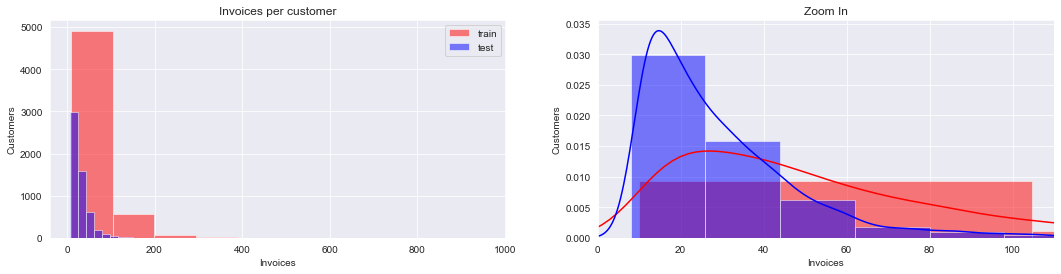

In [93]:
# how many products (no repetition) has the customer bought?
#(relationship between customers and products)
#5 months 
#1st bin : 1-12
plt.gcf()

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
train_invoices.plot(kind='hist', color='r', alpha=0.5,title='Invoices per customer',
                    label='train',grid=True )
test_invoices.plot(kind='hist', color='b', alpha=0.5,title='Invoices per customer'
                   ,label='test',grid=True)
plt.xlabel('Invoices')
plt.ylabel('Customers')
plt.legend()

plt.subplot(1,2,2)
train_invoices.plot(kind='hist', color='r', alpha=0.5,title='Zoom In'
                    ,label='train',xlim=(0,110),grid=True,density=True)
train_invoices.plot(kind='kde',color='r',xlim=(0,110),grid=True,legend=False)                    
                   
test_invoices.plot(kind='hist', color='b', alpha=0.5,title='Zoom In'
                   ,label='test',xlim=(0,110),grid=True,density=True)
test_invoices.plot(kind='kde',color='b',xlim=(0,110),grid=True,legend=False)                   

plt.xlabel('Invoices')
plt.ylabel('Customers')


plt.show();

####  Trainset: 
##### In 150 days __~25__  invoices (times the customer made a purchase) aka  __5 times per month__ 
 *5 months = 5 * 30 = 150 days
 
 *covid pandemic starts at 03/2020

In [94]:
train_invoices=train_invoices.reset_index().rename(columns={'invoiceid':'Count_customer_invoices'})
train_invoices['Count_customer_invoices'].value_counts().reset_index().rename(columns={
    'index':'Sum_invoices','Count_customer_invoices':'Customers'}).set_index('Sum_invoices')[:5]


,Customers
Sum_invoices,
24,100
28,99
13,92
21,91
17,91


####  Testset: 
##### In 60 days __~15__  invoices (times the customer made a purchase) aka  __12.5 times per month__ 
 *2 months = 2 * 30 = 60 days

In [95]:
test_invoices=test_invoices.reset_index().rename(columns={'invoiceid':'Count_customer_invoices'})
test_invoices['Count_customer_invoices'].value_counts().reset_index().rename(columns={
    'index':'Sum_invoices','Count_customer_invoices':'Customers'}).set_index('Sum_invoices')[:5]

,Customers
Sum_invoices,
10,282
11,262
12,240
13,233
15,221


## Recommendation 'ranking' Metrics:



### Quantity

<ipython-input-96-144c5765f568>:19: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



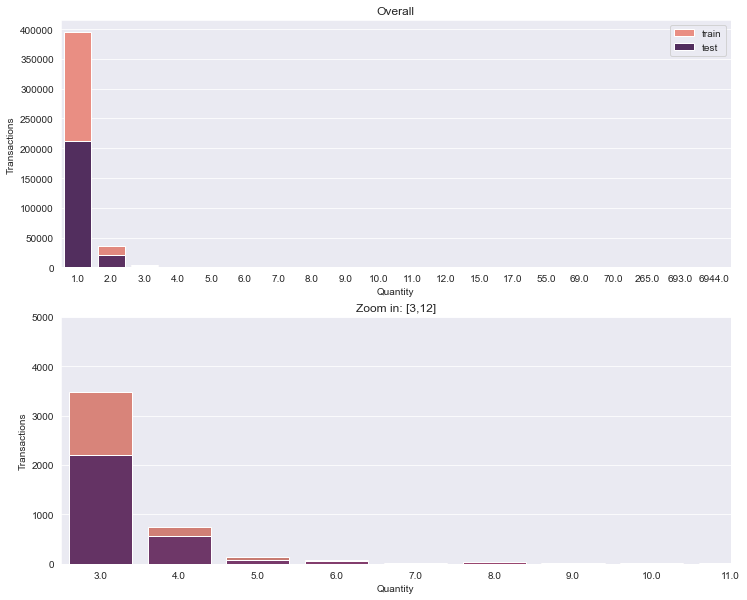

In [96]:
fig, ax =plt.subplots(2,1,figsize=(12,10))
sns.set_style('darkgrid')

# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Quantity", data=train,palette="dark:salmon_r",ax=ax[0],label='train').set_title('Overall')
f1=sns.countplot(x="Quantity", data=test,palette='flare_r',ax=ax[0],label='test' )
f1.set_ylabel('Transactions')


#zoom in x=[2,12]
p1=sns.countplot(x="Quantity", data=train,palette="dark:salmon_r",ax=ax[1] )
p2=sns.countplot(x="Quantity", data=test,palette='flare_r',ax=ax[1] )
p1.set(xlim=(1.5,10),ylim=(0,5000))
p2.set(xlim=(1.5,10),ylim=(0,5000))
p1.set_title('Zoom in: [3,12]')
p1.set_ylabel('Transactions')
f1.legend()
# plt.grid()
fig.show();


In [97]:
#RS format 
train_q=train[['CustomerId','ProductId','Quantity']]
test_q=test[['CustomerId','ProductId','Quantity']]

#sum Quantiy per Customer and ProductId
train_q=train_q.groupby(['CustomerId','ProductId'])['Quantity'].sum().reset_index()
test_q=test_q.groupby(['CustomerId','ProductId'])['Quantity'].sum().reset_index()

train_q.shape

(67107, 3)

### Frequency per Invoice
 

##### per customer and product: 

 
                    (Customer Invoices That Include The Product) /  (All The Customer Invoices)
                                                            
                                               
 

In [98]:
def calculate_frequency(data,column='invoiceid'):
    """
    Input:
    ------
            data:   customer , product transactions data 
            column: column by which to calculate frequency (by Invoice or by Qunatity)
    Purpose:
    --------
            calculate frequency based on provided column
    Output:
    -------
            dataframe with recommedation metric 
    """
    
    #Ιnvoices/Quantity per customer and product
    count_per_customer=data.groupby(['CustomerId','ProductId'])[column].count().reset_index()
    #all invoices/product pieces per customer
    all_count=data.groupby(['CustomerId'])[column].nunique().reset_index()
    #merge
    frequency=count_per_customer.merge(right=all_count,on='CustomerId',how='inner').rename(
                          columns={'{0}_x'.format(column):'per_product_count','{}_y'.format(column):'sum'})
    #rating column name
    if column=='invoiceid':
            rating_column='Frequency1'
    elif column=='Quantity':
            rating_column='Frequency2'                               
    
    #compute frequency
    frequency[rating_column]=round(frequency['per_product_count'] / frequency['sum'],2)
    frequency=frequency[['CustomerId','ProductId',rating_column]]
    return frequency

In [99]:
#trainset
train_frequency1=calculate_frequency(data=train,column='invoiceid')
#testset
test_frequency1=calculate_frequency(data=test,column='invoiceid')
train_frequency1[:5]

,CustomerId,ProductId,Frequency1
0,000CAC9C-AF57-EA11-A81F-000D3A497E15,0DC57A94-EC98-E911-80CF-000D3AB18B8E,0.02
1,000CAC9C-AF57-EA11-A81F-000D3A497E15,34C57A94-EC98-E911-80CF-000D3AB18B8E,0.02
2,000CAC9C-AF57-EA11-A81F-000D3A497E15,A408E898-E998-E911-80CF-000D3AB18B8E,0.91
3,000CAC9C-AF57-EA11-A81F-000D3A497E15,B5700A7C-EC98-E911-80CF-000D3AB18B8E,0.02
4,000CAC9C-AF57-EA11-A81F-000D3A497E15,D50F32CF-E898-E911-80CF-000D3AB18B8E,0.02


C:\Users\Iro\anaconda3\envs\iro\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Iro\anaconda3\envs\iro\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



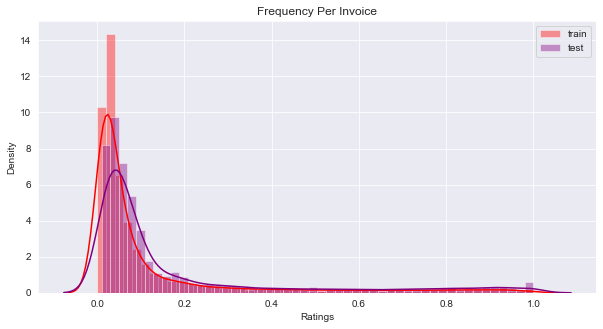

In [100]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

sns.distplot(train_frequency1['Frequency1'],color='red',label='train');
sns.distplot(test_frequency1['Frequency1'],color='purple',label='test');

plt.xlabel('Ratings')
 
plt.title('Frequency Per Invoice') 
plt.legend()
plt.show();


### Frequency per Quantity
 

##### per customer and product: 
***
 
                                         (Product Units Per Customer) / (All Bought Product Units)
 ***   
                                           
 

In [101]:
#trainset
train_frequency2=calculate_frequency(data=train,column='Quantity')
#testset
test_frequency2=calculate_frequency(data=test,column='Quantity')
train_frequency2[:5]

,CustomerId,ProductId,Frequency2
0,000CAC9C-AF57-EA11-A81F-000D3A497E15,0DC57A94-EC98-E911-80CF-000D3AB18B8E,0.5
1,000CAC9C-AF57-EA11-A81F-000D3A497E15,34C57A94-EC98-E911-80CF-000D3AB18B8E,0.5
2,000CAC9C-AF57-EA11-A81F-000D3A497E15,A408E898-E998-E911-80CF-000D3AB18B8E,21.0
3,000CAC9C-AF57-EA11-A81F-000D3A497E15,B5700A7C-EC98-E911-80CF-000D3AB18B8E,0.5
4,000CAC9C-AF57-EA11-A81F-000D3A497E15,D50F32CF-E898-E911-80CF-000D3AB18B8E,0.5


C:\Users\Iro\anaconda3\envs\iro\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Iro\anaconda3\envs\iro\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



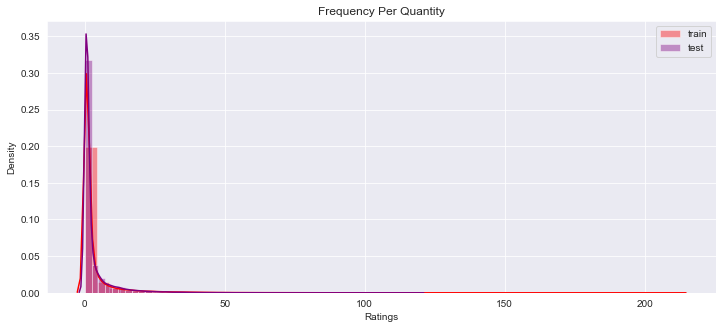

In [102]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')

sns.distplot(train_frequency2['Frequency2'],color='red',label='train');
sns.distplot(test_frequency2['Frequency2'],color='purple',label='test');

plt.xlabel('Ratings')
 
plt.title('Frequency Per Quantity') 
plt.legend()
plt.show();

### Reduce Bias In  Ratings

#### substract mean from ratings

In [103]:
def reduce_bias(data,rating_column):
    """
    Input:
    ------
            data:          dataframe in RS format  
            rating_column: rating metric column
    Purpose:
    --------
            creates new rating column: by calculating the AVERAGE RATING PER PRODUCT and
            substracting it from the rating column  
    Output:
    -------
            dataframe with normalized ratings          
    """
    #calculate average 
    product_mean=data.groupby('ProductId')[rating_column].mean().reset_index().rename(
        columns={rating_column:'mean_frequency'})
    #round up mean frequency
    product_mean['mean_frequency']=round(product_mean['mean_frequency'],3)
    #add to frame 
    data=product_mean.merge(right=data,how='right',on='ProductId')
    #substract the average from the rating metric
    data['new_{}'.format(rating_column)]=round(abs(data[rating_column] - data['mean_frequency']),3)
    #get new rating's column name
    rating_column=data.columns[-1]
    return data , rating_column 

In [104]:
#RS format
train_bias1 , rating_column1 =reduce_bias(data=train_frequency1,rating_column='Frequency1')
test_bias1,   rating_column1 =reduce_bias(data=test_frequency1,rating_column='Frequency1')
train_bias1[:5]


,ProductId,mean_frequency,CustomerId,Frequency1,new_Frequency1
0,0DC57A94-EC98-E911-80CF-000D3AB18B8E,0.303,000CAC9C-AF57-EA11-A81F-000D3A497E15,0.02,0.283
1,34C57A94-EC98-E911-80CF-000D3AB18B8E,0.146,000CAC9C-AF57-EA11-A81F-000D3A497E15,0.02,0.126
2,A408E898-E998-E911-80CF-000D3AB18B8E,0.279,000CAC9C-AF57-EA11-A81F-000D3A497E15,0.91,0.631
3,B5700A7C-EC98-E911-80CF-000D3AB18B8E,0.174,000CAC9C-AF57-EA11-A81F-000D3A497E15,0.02,0.154
4,D50F32CF-E898-E911-80CF-000D3AB18B8E,0.169,000CAC9C-AF57-EA11-A81F-000D3A497E15,0.02,0.149


In [115]:
rating_column1[4:]

'Frequency1'

C:\Users\Iro\anaconda3\envs\iro\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Iro\anaconda3\envs\iro\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Iro\anaconda3\envs\iro\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Iro\ana

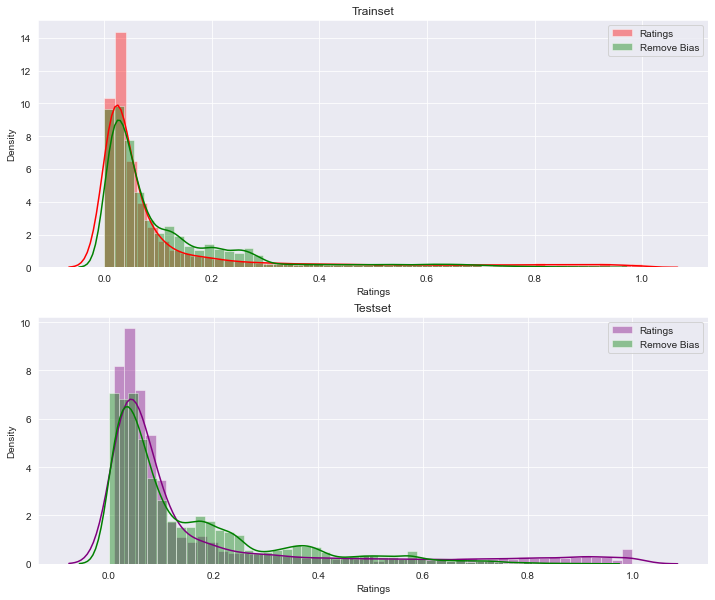

In [116]:
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
plt.subplot(2,1,1)

sns.distplot(train_bias1[rating_column1[4:]],color='red',label='Ratings');
sns.distplot(train_bias1[rating_column1],color='green',label='Remove Bias');
plt.title('Trainset')
plt.xlabel('Ratings')
plt.legend()

plt.subplot(2,1,2)

sns.distplot(test_bias1[rating_column1[4:]],color='purple',label='Ratings');
sns.distplot(test_bias1[rating_column1],color='green',label='Remove Bias');
plt.title('Testset')
plt.xlabel('Ratings')
plt.legend()
plt.show();

In [107]:
# #to dill RS dataframes
# import dill

#quantity
# dill.dump(train_q,open('train_q.d','wb'))
# dill.dump(test_q,open('test_q.d','wb'))

# #frequency1 
# dill.dump(train_frequency1,open('train_f1.d','wb'))
# dill.dump(test_frequency1,open('test_f1.d','wb'))

# #frequency2
# dill.dump(train_frequency2,open('train_f2.d','wb'))
# dill.dump(test_frequency2,open('test_f2.d','wb'))

# #bias frequency1
# train_bias1=train_bias1[['CustomerId','ProductId',rating_column]]
# test_bias1=test_bias1[['CustomerId','ProductId',rating_column]]
# dill.dump(train_bias1,open('train_bias1.d','wb'))
# dill.dump(test_bias1,open('test_bias1.d','wb'))

#whole dataset
# dill.dump(df,open("dataset.d",'wb'))





#### Simlarity between ratings

In [108]:
%run ./All_Functions.py

train_q  , test_q , rating_column = load_dill(rating_column='Quantity')
train_f1 , test_f1 , rating_column = load_dill(rating_column='Frequency1')
train_f2 , test_f2 , rating_column = load_dill(rating_column='Frequency2')
train_b1 , test_b1 , rating_column = load_dill(rating_column='Bias1')

train_b1.head(2)

,CustomerId,ProductId,new_Frequency1
0,000CAC9C-AF57-EA11-A81F-000D3A497E15,0DC57A94-EC98-E911-80CF-000D3AB18B8E,0.283
1,000CAC9C-AF57-EA11-A81F-000D3A497E15,34C57A94-EC98-E911-80CF-000D3AB18B8E,0.126


<Figure size 432x288 with 0 Axes>

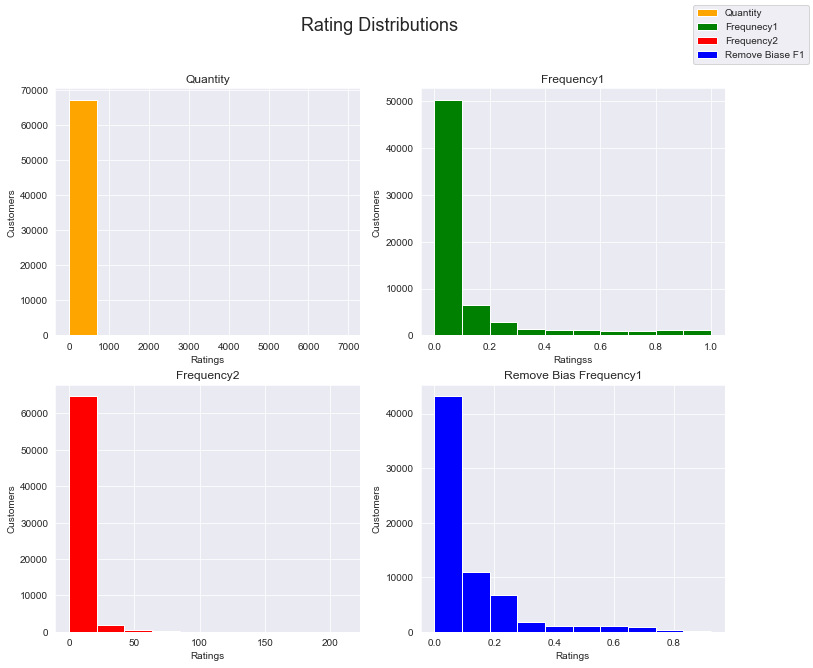

In [109]:
#plot rating distributions
fig , ax = plt.subplots(2,2,figsize=(12,10))
fig.suptitle('Rating Distributions', fontsize=18)
ax[0,0].hist(train_q[train_q.columns[-1]],color='orange',label='Quantity')
ax[0,1].hist(train_f1[train_f1.columns[-1]],color='green',label='Frequnecy1')
ax[1,0].hist(train_f2[train_f2.columns[-1]],color='red',label='Frequency2')
ax[1,1].hist(train_b1[train_b1.columns[-1]],color='blue',label='Remove Biase F1');

ax[0,0].set_ylabel('Customers')
ax[0,0].set_xlabel('Ratings')
ax[0,0].set_title('Quantity')

ax[0,1].set_ylabel('Customers')
ax[0,1].set_xlabel('Ratingss')
ax[0,1].set_title('Frequency1')

ax[1,0].set_ylabel('Customers')
ax[1,0].set_xlabel('Ratings')
ax[1,0].set_title('Frequency2')

ax[1,1].set_ylabel('Customers')
ax[1,1].set_xlabel('Ratings')
ax[1,1].set_title('Remove Bias Frequency1')



 
fig.legend();


***
                                                                  END OF PREPROCESSING
***                                                         